In [1]:
import numpy as np
import matplotlib.pyplot as plt

from experiment import Experiment

100%|██████████| 50/50 [00:24<00:00,  2.05it/s]


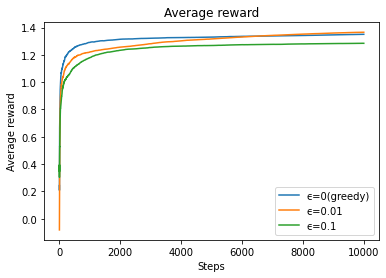

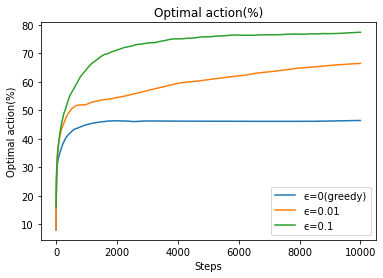

In [2]:
exp_fig2 = Experiment()

exp_fig2.set_config('n_steps', 10000)

exp_fig2.set_config('epsilon', 0.0)
exp_fig2.run('ϵ=0(greedy)')

exp_fig2.set_config('epsilon', 0.01)
exp_fig2.run('ϵ=0.01')

exp_fig2.set_config('epsilon', 0.1)
exp_fig2.run('ϵ=0.1')

exp_fig2.show_results()

100%|██████████| 50/50 [00:02<00:00, 18.60it/s]


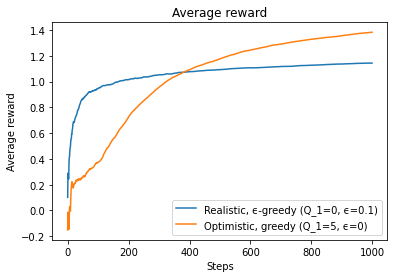

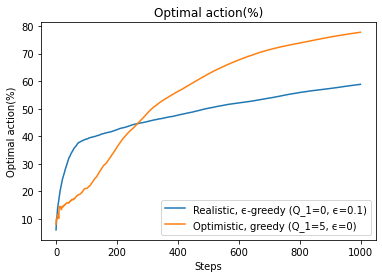

In [3]:
exp_fig3 = Experiment()

exp_fig3.set_config('initial_value', 0)
exp_fig3.set_config('epsilon', 0.1)
exp_fig3.run('Realistic, ϵ-greedy (Q_1=0, ϵ=0.1)')

exp_fig3.set_config('initial_value', 5)
exp_fig3.set_config('epsilon', 0)
exp_fig3.run('Optimistic, greedy (Q_1=5, ϵ=0)')

exp_fig3.show_results()

100%|██████████| 50/50 [00:23<00:00,  2.12it/s]


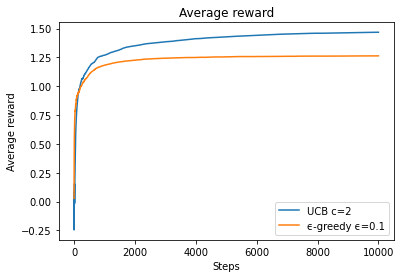

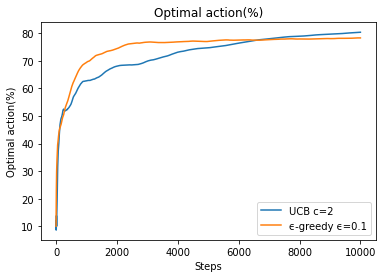

In [4]:
exp_fig4 = Experiment()

exp_fig4.set_config('n_steps', 10000)

exp_fig4.set_config('solver_name', 'UCB1')
exp_fig4.set_config('conf_coeff', 2)
exp_fig4.run('UCB c=2')

exp_fig4.set_config('solver_name', 'epsilon-greedy')
exp_fig4.run('ϵ-greedy ϵ=0.1')
exp_fig4.show_results()

100%|██████████| 50/50 [00:04<00:00, 10.72it/s]


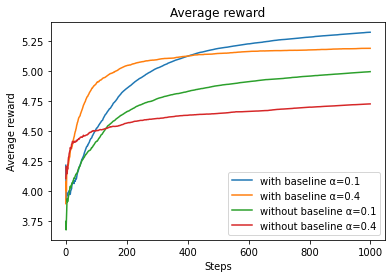

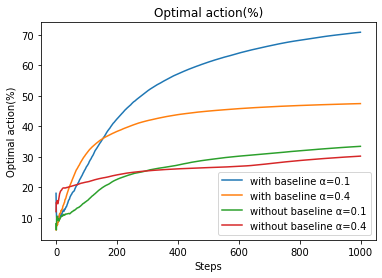

In [5]:
exp_fig5 = Experiment()

exp_fig5.set_config('solver_name', 'policygradient')
exp_fig5.set_config('problem_mean', 4)

exp_fig5.set_config('with_baseline', True)
exp_fig5.set_config('step_size', 0.1)
exp_fig5.run('with baseline α=0.1')
exp_fig5.set_config('step_size', 0.4)
exp_fig5.run('with baseline α=0.4')

exp_fig5.set_config('with_baseline', False)
exp_fig5.set_config('step_size', 0.1)
exp_fig5.run('without baseline α=0.1')
exp_fig5.set_config('step_size', 0.4)
exp_fig5.run('without baseline α=0.4')

exp_fig5.show_results()

100%|██████████| 50/50 [00:02<00:00, 19.37it/s]


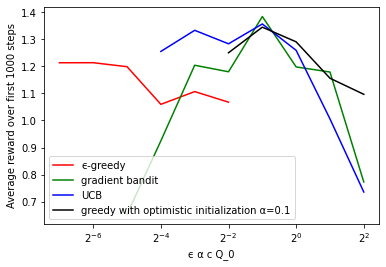

In [6]:
fig, ax = plt.subplots()

exp_fig6 = Experiment()

epsilon = [1/128, 1/64, 1/32, 1/16, 1/8, 1/4]
average_reward_over_first_1000_steps = []
exp_fig6.set_config('solver_name', 'epsilon-greedy')
for e in epsilon:
    exp_fig6.set_config('epsilon', e)
    average_reward, _ = exp_fig6.run('experiment')
    average_reward_over_first_1000_steps.append(np.mean(average_reward))
plt.plot(epsilon, average_reward_over_first_1000_steps, label='ϵ-greedy', c='red')
exp_fig6.reset_config()


alpha = [1/32, 1/16, 1/8, 1/4, 1/2, 1, 2, 4]
average_reward_over_first_1000_steps = []
exp_fig6.set_config('solver_name', 'policygradient')
for a in alpha:
    exp_fig6.set_config('step_size', a)
    average_reward, _ = exp_fig6.run('experiment')
    average_reward_over_first_1000_steps.append(np.mean(average_reward))
plt.plot(alpha, average_reward_over_first_1000_steps, label='gradient bandit', c='green')
exp_fig6.reset_config()


conf_coeff = [1/16, 1/8, 1/4, 1/2, 1, 2, 4]
average_reward_over_first_1000_steps = []
exp_fig6.set_config('solver_name', 'UCB1')
for c in conf_coeff:
    exp_fig6.set_config('conf_coeff', c)
    average_reward, _ = exp_fig6.run('experiment')
    average_reward_over_first_1000_steps.append(np.mean(average_reward))
plt.plot(conf_coeff, average_reward_over_first_1000_steps, label='UCB', c='blue')
exp_fig6.reset_config()


Q_0 = [1/4, 1/2, 1, 2, 4]
average_reward_over_first_1000_steps = []
exp_fig6.set_config('solver_name', 'epsilon-greedy')
exp_fig6.set_config('epsilon', 0)
for q0 in Q_0:
    exp_fig6.set_config('initial_value', q0)
    average_reward, _ = exp_fig6.run('experiment')
    average_reward_over_first_1000_steps.append(np.mean(average_reward))
plt.plot(Q_0, average_reward_over_first_1000_steps, label='greedy with optimistic initialization α=0.1', c='black')
exp_fig6.reset_config()


plt.legend()
plt.xlabel('ϵ α c Q_0')
plt.ylabel('Average reward over first 1000 steps')
ax.set_xscale('log', basex=2)
plt.show()